https://www.youtube.com/watch?v=rJ3AZCQuiLw <br>
https://medium.com/@whystudying/resampling-with-python-permutation-test-19421dc38dac

### When To Use
1. Small Sample Sizes
When you have a small dataset, traditional parametric tests may not provide reliable results due to insufficient data to accurately estimate parameters like mean and standard deviation. Permutation tests don't have this limitation.

2. Non-Normal Distribution
Many parametric tests assume that the data follows a specific distribution (often the normal distribution). If your data does not meet this assumption, a non-parametric test like permutation tests can be more appropriate.

3. Non-Equality of Variance
Permutation tests don't require an assumption of equal variances between groups, unlike some parametric tests such as the t-test.

4. Flexibility in Test Statistic
Permutation tests allow you to define your own test statistic tailored to your specific research question. This provides a level of flexibility that many parametric tests don't offer.

5. Independence Violations
If your data violates the assumption of independence, more complex permutation test strategies can sometimes still be employed, such as block permutation for time-series data.

6. Multiple Groups or Points in Time
Permutation tests can be extended to more complex experimental designs involving more than two groups or multiple points in time.

7. Control over Type I Error
Permutation tests allow for exact control over Type I error rates, unlike parametric tests which provide approximate control.

8. Exploratory Data Analysis
Because they make fewer assumptions, permutation tests can be a useful tool in exploratory data analysis where the goal is to uncover interesting patterns or effects without being too constrained by assumptions.

9. Simplicity and Ease of Understanding
Permutation tests are conceptually simpler than many parametric tests, making them easier to explain and understand.

10. Generalizability
Because they make fewer assumptions, the results of permutation tests can sometimes be more easily generalized to broader populations.

### When Not To Use
Permutation tests can be computationally expensive, especially for large datasets or when a large number of permutations are needed to get an accurate p-value. Also, if your data meet the assumptions of a parametric test and you have a large sample size, parametric tests may be more powerful in detecting an effect.

### Summary
If I am interested in the difference of means, the permutation hypothesis testing is building a sampling distribution of the difference of the means. <br>

**Traditional Parametric Testing:** You often assume a specific form for the sampling distribution (e.g., normal distribution for the difference of means), which depends on assumptions that may or may not hold true for your data.

**Permutation Testing:** You empirically estimate the sampling distribution of the test statistic (in this case, the difference of means) through permutations of your data, under the assumption that the null hypothesis is true. This approach does not require you to assume a specific distributional form.

### Idea
#### Exchangeability and the Null Hypothesis
The core assumption of a permutation test is that under the null hypothesis, the group labels are exchangeable; that is, swapping labels shouldn't make a difference. If the null hypothesis that there is no difference between the groups is true, then any permutation of the group labels should be just as likely as the observed arrangement.

#### Empirical Distribution
By calculating the difference in means for a large number of permutations, you're essentially asking, "If the null hypothesis is true and the group labels don't matter, what kind of differences in means should I expect to see just by chance?" The answers to this question form an empirical sampling distribution that reflects the variability of the difference in means under the null hypothesis.

#### Non-parametric Nature
Permutation tests don't make assumptions about the distribution of the data or the sampling distribution of the test statistic. This makes them robust to violations of the assumptions that parametric tests might require, such as normality or homogeneity of variance. The empirical distribution generated by the permutations serves as an approximation of the sampling distribution, free from parametric assumptions.

#### Large Number of Permutations
Typically, a large number of permutations are used to estimate this distribution. The more permutations you calculate, the better your estimate will be. This improves the reliability of the p-value calculated for the test.

#### Practical Implications
If the observed difference in means (or any other test statistic of interest) falls into the extreme tails of this empirically generated distribution, then it suggests that the observed difference is unlikely to have occurred by random chance alone, leading you to reject the null hypothesis.

In [ ]:
# Import NumPy: We use NumPy for numerical operations like calculating the mean and random shuffling.

# 1. Calculate Mean Difference: The function calculate_mean_difference takes two groups as input and returns the difference of their means.

# 2. Permutation Test Function: The function permutation_test performs the actual permutation test.

#   *  It first calculates the observed difference in means between the two input groups.

#   * It then combines the groups, and randomly permutes them a specified number of times (num_permutations).

#    * For each permutation, it calculates the new mean difference and checks whether it is greater than or equal to the observed difference.

#    * Finally, it calculates the p-value as the fraction of permutations where the permuted mean difference is greater than or equal to the observed difference.

# 4. Sample Data: We've got sample exam scores for two classes (group1 and group2).

# 5. Perform the Test: We then call the permutation_test function on the sample data.

# 6. Print P-value: The p-value is printed at the end. If it is less than a certain threshold (commonly 0.05), you can reject the null hypothesis, indicating that the groups are significantly different.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

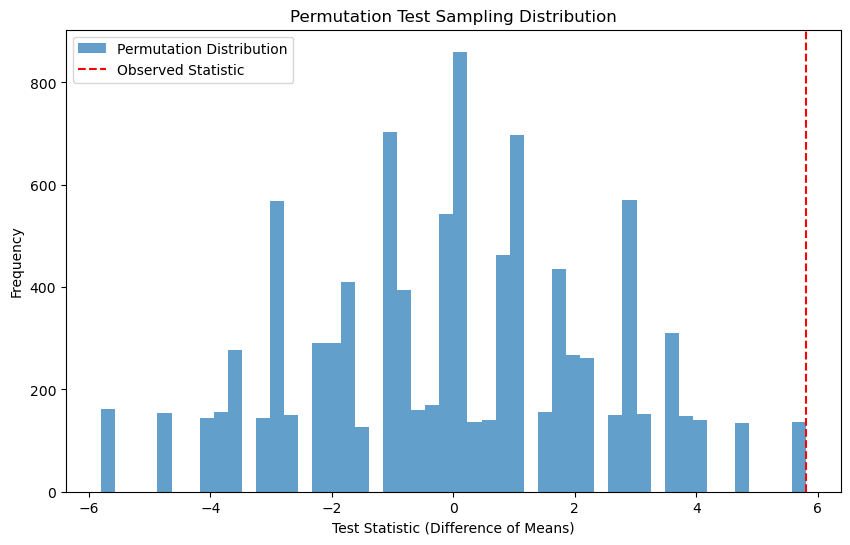

Observed Statistic: 5.799999999999999
P-value: 0.0298


In [7]:
# Generate some example data
group_a = np.array([1.1, 2.9, 3.2, 4.8])
group_b = np.array([7.1, 8.5, 9.2, 10.4])

# Calculate observed test statistic (difference of means)
observed_statistic = np.mean(group_b) - np.mean(group_a)

# Combine the groups
combined_data = np.concatenate([group_a, group_b])

# Initialize an empty list to hold permutation-based test statistics
permuted_statistics = []

# Number of permutations
n_permutations = 10000

# Generate permutation-based test statistics
for _ in range(n_permutations):
    # Shuffle the data
    np.random.shuffle(combined_data)
    
    # Split the permuted array into two groups
    perm_group_a = combined_data[:len(group_a)]
    perm_group_b = combined_data[len(group_a):]
    
    # Calculate the test statistic for this permutation
    permuted_stat = np.mean(perm_group_b) - np.mean(perm_group_a)
    
    # Append to list
    permuted_statistics.append(permuted_stat)

# Calculate p-value
p_value = np.sum(np.abs(permuted_statistics) >= np.abs(observed_statistic)) / n_permutations

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(permuted_statistics, bins=50, alpha=0.7, label='Permutation Distribution')
plt.axvline(x=observed_statistic, color='red', linestyle='--', label='Observed Statistic')
plt.title('Permutation Test Sampling Distribution')
plt.xlabel('Test Statistic (Difference of Means)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Observed Statistic: {observed_statistic}")
print(f"P-value: {p_value}")
